# Name: Habtom Woldu
# Date: 06/19/2023
# Task three Module 7

# Time Series 
# Simple Linear Regression 

# Given a Fahrenheit temperature, we can calculate the corresponding Celsius temperature

In [3]:
c = lambda f: 5/9 * (f-32)



In [7]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [28]:
import pandas as pd 

In [29]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

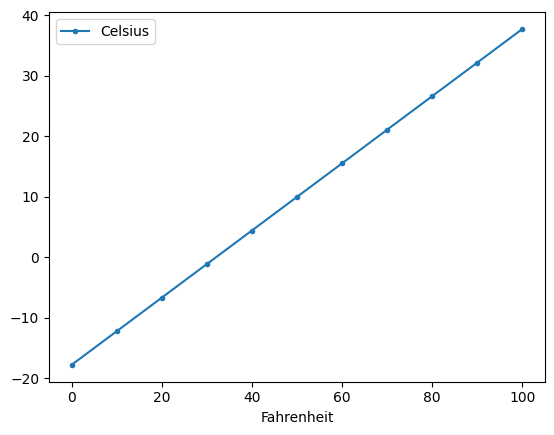

In [30]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

In [31]:
y_label = axes.set_ylabel('Celsius')

In [32]:
print(temps)

[(0, -17.77777777777778), (10, -12.222222222222223), (20, -6.666666666666667), (30, -1.1111111111111112), (40, 4.444444444444445), (50, 10.0), (60, 15.555555555555557), (70, 21.11111111111111), (80, 26.666666666666668), (90, 32.22222222222222), (100, 37.77777777777778)]


# Loading the average High Temperature into a DataFrame

In [43]:
nyc = pd.read_csv('C:/Users/habto/Desktop/Newyork Data Temp.csv')

# We can look at the DataFrame's head and tail 

In [44]:
nyc.head()

,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [45]:
nyc.tail()

,Date,Value,Anomaly
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4
123,2018,38.7,1.3


# Cleaning the Data
# example to rename column name

In [47]:
nyc = pd.read_csv('C:/Users/habto/Desktop/Newyork Data Temp.csv')

In [48]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [49]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


# Calculating Basic Descriptive Statistics

In [50]:
pd.set_option('display.precision', 2)

In [51]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

# Calculate slope and intercept using SciPy Library 

In [52]:
from scipy import stats

In [53]:
linear_regression = stats.linregress(x=nyc.Date,y=nyc.Temperature)

In [54]:
linear_regression.slope

0.014771361132966163

In [55]:
linear_regression.intercept

8.694993233674289

# Use the result of slope and y intercept to predict future January Average High Temperature

In [56]:
linear_regression.slope *2026 + linear_regression.intercept

38.62177088906374

# Plotting the average High Temperature and a Regression line

In [57]:
import seaborn as sns

In [58]:
sns.set_style('whitegrid')

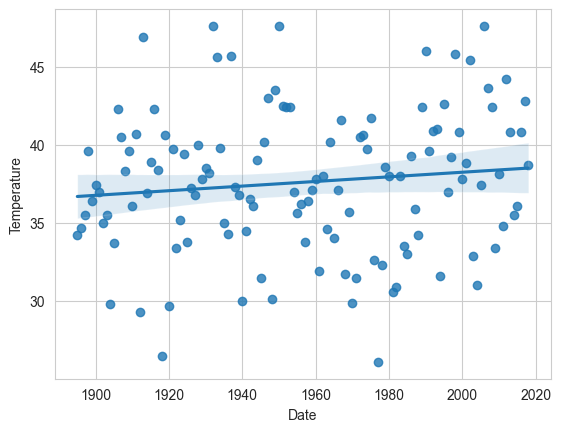

In [59]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [60]:
axes.set_ylim(10,70)

(10.0, 70.0)

# Time Series and Simple Linear Regression using a scikit-learner estimator

# Loading the Average High Temperatures into a DataFrame

In [67]:
import pandas as pd

In [66]:
nyc = pd.read_csv('C:/Users/habto/OneDrive/Documents/New york Data.csv')

In [68]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [69]:
nyc.Date = nyc.Date.floordiv(100)

In [70]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,29.5,-2.1
1,1896,28.5,-3.1
2,1897,29.4,-2.2


# Splitting the Data for Training and Testing

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values,random_state=11)

In [73]:
x_train.shape

(93, 1)

In [74]:
x_test.shape

(31, 1)

# Traininf the Model
# Scikit-learn dies not have a separate class for simple linear regression because it is just a sepcial case if multiple regression. 
# So let's train a LinearRegression estimator

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
linear_regression = LinearRegression()

In [84]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [81]:
linear_regression.coef_

array([0.02317155])

In [82]:
linear_regression.intercept_

-13.687408961929531

# Testing the model

In [85]:
predicted = linear_regression.predict(x_test)

In [86]:
expected = y_test

In [87]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected{e:.2f}')

predicted: 31.91, expected25.80
predicted: 32.91, expected29.70
predicted: 30.89, expected32.10
predicted: 31.20, expected39.50
predicted: 32.15, expected27.20
predicted: 31.66, expected27.90
predicted: 30.83, expected33.20


# Predicting Future Temperatures and Estimating past Temperatures.
# Use the coef_ as slope and the intercept_ as y intercept. 

In [88]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [89]:
predict(2026)

array([33.25815855])

# Visualizing the Dataset with the Regression line
# Creating scatter plot using Seaborn's scatterplot and Matplotlib's plot function. 

In [90]:
import seaborn as sns

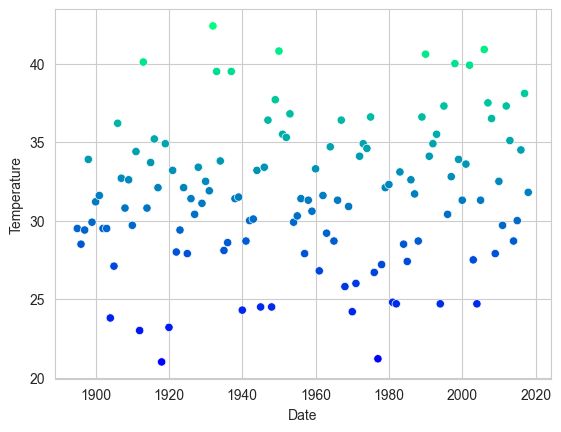

In [100]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)


In [101]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [102]:
import numpy as np

In [104]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [105]:
y = predict(x)

In [107]:
import matplotlib.pyplot as plt

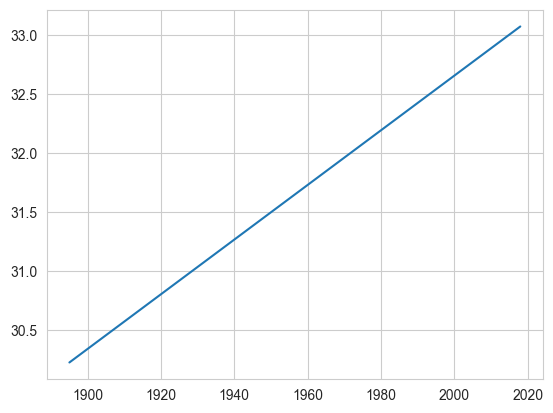

In [106]:
line = plt.plot(x,y)